# Loading the Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, average_precision_score, roc_curve

In [2]:
train = pd.read_csv('../tmp_dataset/train_scorecard.csv')
test = pd.read_csv('../tmp_dataset/test_scorecard.csv')

In [3]:
pd.set_option('display.max_info_columns', 200)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307499 entries, 0 to 307498
Data columns (total 142 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307499 non-null  int64  
 1    TARGET                        307499 non-null  int64  
 2    NAME_CONTRACT_TYPE            307499 non-null  object 
 3    CODE_GENDER                   307499 non-null  object 
 4    FLAG_OWN_CAR                  307499 non-null  object 
 5    FLAG_OWN_REALTY               307499 non-null  object 
 6    CNT_CHILDREN                  307499 non-null  int64  
 7    AMT_INCOME_TOTAL              307499 non-null  float64
 8    AMT_CREDIT                    307499 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307499 non-null  float64
 11   NAME_TYPE_SUITE               307499 non-null  object 
 12   NAME_INCOME_TYPE            

In [5]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,CTI_RATIO,HIGH_CTI,HIGH_CTI_RISK,ATI_RATIO,HIGH_ATI,HIGH_ATI_RISK,GTI_RATIO,HIGH_GTI,HIGH_GTI_RISK,AGE_YEARS
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.007889,False,0,0.121978,False,0,1.733333,False,0,25.902806
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,4.790750,False,0,0.132217,False,0,4.183333,False,0,45.900068
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,2.000000,False,0,0.100000,False,0,2.000000,False,0,52.145106
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2.316167,False,0,0.219900,False,0,2.200000,False,0,52.032854
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,4.222222,False,0,0.179963,False,0,4.222222,False,0,54.570842


In [6]:
test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,CTI_RATIO,HIGH_CTI,HIGH_CTI_RISK,ATI_RATIO,HIGH_ATI,HIGH_ATI_RISK,GTI_RATIO,HIGH_GTI,HIGH_GTI_RISK,AGE_YEARS
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,4.213333,False,0,0.152300,False,0,3.333333,False,0,52.678987
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,2.250182,False,0,0.175455,False,0,1.818182,False,0,49.456537
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,3.275378,False,0,0.344578,False,0,3.111111,False,0,54.861054
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,5.000000,False,0,0.155614,False,0,5.000000,False,0,38.264203
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,3.475000,False,0,0.178150,False,0,3.475000,False,0,35.701574


In [7]:
train.isna().sum().sum(), test.isna().sum().sum()

(0, 0)

# Creating New Features

In [8]:
def safe_div(a, b):
    return a / b.replace(0, np.nan) # avoid infinity

In [9]:
# Ratios
if {'AMT_ANNUITY','AMT_CREDIT'}.issubset(train.columns):
    train['PAYMENT_RATE'] = safe_div(train['AMT_ANNUITY'], train['AMT_CREDIT'])
    test['PAYMENT_RATE']  = safe_div(test['AMT_ANNUITY'],  test['AMT_CREDIT'])

if {'AMT_CREDIT','AMT_INCOME_TOTAL'}.issubset(train.columns):
    train['CREDIT_INCOME_RATIO'] = safe_div(train['AMT_CREDIT'], train['AMT_INCOME_TOTAL'])
    test['CREDIT_INCOME_RATIO']  = safe_div(test['AMT_CREDIT'],  test['AMT_INCOME_TOTAL'])

if {'AMT_ANNUITY','AMT_INCOME_TOTAL'}.issubset(train.columns):
    train['ANNUITY_INCOME_RATIO'] = safe_div(train['AMT_ANNUITY'], train['AMT_INCOME_TOTAL'])
    test['ANNUITY_INCOME_RATIO']  = safe_div(test['AMT_ANNUITY'],  test['AMT_INCOME_TOTAL'])

if {'AMT_CREDIT','AMT_GOODS_PRICE'}.issubset(train.columns):
    train['CREDIT_GOODS_RATIO'] = safe_div(train['AMT_CREDIT'], train['AMT_GOODS_PRICE'])
    test['CREDIT_GOODS_RATIO']  = safe_div(test['AMT_CREDIT'],  test['AMT_GOODS_PRICE'])

if {'AMT_INCOME_TOTAL','CNT_FAM_MEMBERS'}.issubset(train.columns):
    train['INCOME_PER_PERSON'] = safe_div(train['AMT_INCOME_TOTAL'], train['CNT_FAM_MEMBERS'].replace(0, np.nan))
    test['INCOME_PER_PERSON']  = safe_div(test['AMT_INCOME_TOTAL'],  test['CNT_FAM_MEMBERS'].replace(0, np.nan))

# Replace Some Values (plot_woe_feature)

To get an interpretable output from `plot_woe_feature`

In [10]:
train.describe()[['DAYS_EMPLOYED','TOTALAREA_MODE','LIVINGAREA_MEDI','APARTMENTS_MEDI']]

,DAYS_EMPLOYED,TOTALAREA_MODE,LIVINGAREA_MEDI,APARTMENTS_MEDI
count,307499.000000,307499.000000,307499.000000,307499.00000
mean,63812.830367,-482.139016,-501.367566,-506.91905
std,141273.944327,499.252106,499.551425,499.50377
min,-17912.000000,-999.000000,-999.000000,-999.00000
25%,-2760.000000,-999.000000,-999.000000,-999.00000
50%,-1214.000000,0.005000,-999.000000,-999.00000
75%,-289.000000,0.070300,0.074600,0.08430
max,365243.000000,1.000000,1.000000,1.00000


In [11]:
# DAYS_EMPLOYED: 365243 -> NaN
train.loc[train['DAYS_EMPLOYED'] == 365243, 'DAYS_EMPLOYED'] = np.nan
test.loc[test['DAYS_EMPLOYED'] == 365243, 'DAYS_EMPLOYED'] = np.nan

In [12]:
# Area-related sentinels: -999 -> NaN
col = ['TOTALAREA_MODE', 'LIVINGAREA_MEDI', 'APARTMENTS_MEDI']
train[col] = train[col].replace(-999, np.nan)
test[col] = test[col].replace(-999, np.nan)

In [13]:
train.describe()[['DAYS_EMPLOYED','TOTALAREA_MODE','LIVINGAREA_MEDI','APARTMENTS_MEDI']]

,DAYS_EMPLOYED,TOTALAREA_MODE,LIVINGAREA_MEDI,APARTMENTS_MEDI
count,252129.000000,159077.000000,153158.000000,151448.000000
mean,-2384.189780,0.102547,0.108607,0.117849
std,2338.387212,0.107463,0.112260,0.109076
min,-17912.000000,0.000000,0.000000,0.000000
25%,-3175.000000,0.041200,0.045700,0.058300
50%,-1648.000000,0.068800,0.074900,0.086400
75%,-767.000000,0.127600,0.130300,0.148900
max,0.000000,1.000000,1.000000,1.000000


In [14]:
train.isna().sum().sum(), test.isna().sum().sum()

(514184, 79329)

# WOE Encoding and IV

In [15]:
train_backup = train.copy()
test_backup = test.copy()

## Numerical Feature - One Feature

In [16]:
# Pick data, target, and a numeric feature
TARGET_COL = 'TARGET'
ID_COL = 'SK_ID_CURR'

y = train[TARGET_COL].astype(int)

In [17]:
# Common numeric features
preferred_numeric = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'DAYS_BIRTH']
num_candidates = [c for c in preferred_numeric if c in train.columns]

if len(num_candidates) == 0:
    for c in train.select_dtypes(include=[np.number]).columns:
        if c not in [TARGET_COL, ID_COL]:
            num_candidates.append(c)
            break

NUM_FEAT = num_candidates[0]
NUM_FEAT

'AMT_INCOME_TOTAL'

In [18]:
# Totals of good and bad
total_bad = int((y == 1).sum())
total_good = int((y == 0).sum())
eps = 0.5  # smoothing to avoid division by zero
total_bad_s = total_bad + 2*eps
total_good_s = total_good + 2*eps

total_good, total_bad

(282675, 24824)

In [19]:
# Quantile bins (equal-frequency)
x = train[NUM_FEAT]
num_binned = pd.qcut(x, q=5, duplicates='drop')

num_binned.value_counts(dropna=False).sort_index()

AMT_INCOME_TOTAL
(25649.999, 99000.0]      63667
(99000.0, 135000.0]       85755
(135000.0, 162000.0]      35452
(162000.0, 225000.0]      75510
(225000.0, 18000090.0]    47115
Name: count, dtype: int64

In [20]:
# Counts per bin
tmp = pd.DataFrame({'bin': num_binned, 'y': y})
grp = tmp.groupby('bin', dropna=False)
bin_stats = grp['y'].agg(['sum', 'count']).reset_index()
bin_stats = bin_stats.rename(columns={'sum':'bad', 'count':'total'})
bin_stats['good'] = bin_stats['total'] - bin_stats['bad']
bin_stats

,bin,bad,total,good
0,"(25649.999, 99000.0]",5225,63667,58442
1,"(99000.0, 135000.0]",7365,85755,78390
2,"(135000.0, 162000.0]",3079,35452,32373
3,"(162000.0, 225000.0]",6084,75510,69426
4,"(225000.0, 18000090.0]",3071,47115,44044


In [21]:
# missing bin: add a MISSING row (if there are NaNs)
miss_mask = x.isna()
if miss_mask.any():
    bad_m = int(y[miss_mask].sum())
    tot_m = int(miss_mask.sum())
    good_m = tot_m - bad_m
    missing_row = pd.DataFrame({'bin':['MISSING'], 'bad':[bad_m], 'total':[tot_m], 'good':[good_m]})
    bin_stats_full = pd.concat([bin_stats, missing_row], ignore_index=True)
else:
    bin_stats_full = bin_stats.copy()

bin_stats_full

,bin,bad,total,good
0,"(25649.999, 99000.0]",5225,63667,58442
1,"(99000.0, 135000.0]",7365,85755,78390
2,"(135000.0, 162000.0]",3079,35452,32373
3,"(162000.0, 225000.0]",6084,75510,69426
4,"(225000.0, 18000090.0]",3071,47115,44044


In [22]:
# Compute Good%, Bad%, WOE, IV per bin
rows = []
for _, r in bin_stats_full.iterrows():
    good = r['good'] + eps
    bad  = r['bad']  + eps
    prop_good = good / total_good_s
    prop_bad  = bad  / total_bad_s
    woe = np.log(prop_good / prop_bad)
    iv  = (prop_good - prop_bad) * woe
    rows.append([r['bin'], r['good'], r['bad'], prop_good, prop_bad, woe, iv])

woe_table_num = pd.DataFrame(rows, columns=['bin','good','bad','Good%','Bad%','WOE','IV'])
woe_table_num

,bin,good,bad,Good%,Bad%,WOE,IV
0,"(25649.999, 99000.0]",58442,5225,0.206747,0.210493,-0.017957,0.000067
1,"(99000.0, 135000.0]",78390,7365,0.277316,0.296697,-0.067554,0.001309
2,"(135000.0, 162000.0]",32373,3079,0.114525,0.124048,-0.079877,0.000761
3,"(162000.0, 225000.0]",69426,6084,0.245605,0.245096,0.002074,0.000001
4,"(225000.0, 18000090.0]",44044,3071,0.155813,0.123726,0.230584,0.007399


In [23]:
# Total IV, mapping, and edges
iv_total_num = float(woe_table_num['IV'].sum())

woe_map_bins = {}
missing_woe = 0.0

for _, r in woe_table_num.iterrows():
    b = r['bin']
    if b == 'MISSING':
        missing_woe = float(r['WOE'])
    else:
        woe_map_bins[b] = float(r['WOE'])

# Extract edges from the category object for reproducibility
if pd.api.types.is_categorical_dtype(num_binned):
    cats = num_binned.cat.categories
    edges = [cats[i].left for i in range(len(cats))] + [cats[-1].right]
else:
    edges = None

print("IV(total) =", iv_total_num)
print("Missing WOE =", missing_woe)
woe_map_bins, edges

IV(total) = 0.009536957128064717
Missing WOE = 0.0


({Interval(25649.999, 99000.0, closed='right'): -0.017957277681736217,
  Interval(99000.0, 135000.0, closed='right'): -0.06755434524335047,
  Interval(135000.0, 162000.0, closed='right'): -0.07987721476032432,
  Interval(162000.0, 225000.0, closed='right'): 0.002073929699061238,
  Interval(225000.0, 18000090.0, closed='right'): 0.23058428933377167},
 [25649.999, 99000.0, 135000.0, 162000.0, 225000.0, 18000090.0])

In [24]:
# Apply numeric WOE mapping to the original column
if edges is not None and len(edges) >= 2:
    cut_bins = [-np.inf] + list(edges[1:-1]) + [np.inf]
    x_binned_again = pd.cut(x, bins=cut_bins, include_lowest=True)
    woe_numeric_col = x_binned_again.map(woe_map_bins).fillna(missing_woe).astype(float)
else:
    woe_numeric_col = pd.Series(0.0, index=x.index)

woe_numeric_col.head(10)

0    0.002074
1    0.000000
2    0.000000
3   -0.067554
4   -0.067554
5    0.000000
6    0.002074
7    0.000000
8   -0.067554
9   -0.067554
Name: AMT_INCOME_TOTAL, dtype: float64

## Categorical Feature - One Feature

In [25]:
# Pick a categorical feature
preferred_cat = ['NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'CODE_GENDER']
cat_candidates = [c for c in preferred_cat if c in train.columns]

if len(cat_candidates) == 0:
    for c in train.select_dtypes(include=['object', 'category']).columns:
        if train[c].nunique(dropna=True) <= 50: 
            cat_candidates.append(c)
            break

CAT_FEAT = cat_candidates[0]
CAT_FEAT

'NAME_EDUCATION_TYPE'

In [26]:
# Handle missing values
xcat = train[CAT_FEAT].astype('object').fillna('MISSING')

# Rare subcategories (fewer than 50) will be grouped into the OTHER category
min_count = 50
level_counts = xcat.value_counts(dropna=False)
rare_levels = set(level_counts[level_counts < min_count].index.tolist())

xcat_grouped = xcat.apply(lambda v: 'OTHER' if v in rare_levels else v)
xcat_grouped.value_counts(dropna=False)

NAME_EDUCATION_TYPE
Secondary / secondary special    218383
Higher education                  74860
Incomplete higher                 10277
Lower secondary                    3815
Academic degree                     164
Name: count, dtype: int64

In [27]:
# Counts per level
tmpc = pd.DataFrame({'lvl': xcat_grouped, 'y': y})
grp = tmpc.groupby('lvl', dropna=False)
lvl_stats = grp['y'].agg(['sum','count']).reset_index()
lvl_stats = lvl_stats.rename(columns={'sum':'bad','count':'total'})
lvl_stats['good'] = lvl_stats['total'] - lvl_stats['bad']
lvl_stats

,lvl,bad,total,good
0,Academic degree,3,164,161
1,Higher education,4009,74860,70851
2,Incomplete higher,872,10277,9405
3,Lower secondary,417,3815,3398
4,Secondary / secondary special,19523,218383,198860


In [28]:
# Compute WOE and IV per level
rows = []
for _, r in lvl_stats.iterrows():
    good = r['good'] + eps
    bad  = r['bad']  + eps
    prop_good = good / total_good_s
    prop_bad  = bad  / total_bad_s
    woe = np.log(prop_good / prop_bad)
    iv  = (prop_good - prop_bad) * woe
    rows.append([r['lvl'], r['good'], r['bad'], prop_good, prop_bad, woe, iv])

woe_table_cat = pd.DataFrame(rows, columns=['level','good','bad','Good%','Bad%','WOE','IV'])
woe_table_cat

,level,good,bad,Good%,Bad%,WOE,IV
0,Academic degree,161,3,0.000571,0.000141,1.399292,0.000602
1,Higher education,70851,4009,0.250646,0.161511,0.439469,0.039172
2,Incomplete higher,9405,872,0.033273,0.035146,-0.054763,0.000103
3,Lower secondary,3398,417,0.012023,0.016818,-0.335645,0.001609
4,Secondary / secondary special,198860,19523,0.703493,0.786445,-0.111465,0.009246


In [29]:
# Total IV and mapping
iv_total_cat = float(woe_table_cat['IV'].sum())

woe_map_levels = {}
for _, r in woe_table_cat.iterrows():
    lvl = r['level']
    woe_map_levels[lvl] = float(r['WOE'])

print("IV(total) =", iv_total_cat)
woe_map_levels

IV(total) = 0.05073265431525314


{'Academic degree': 1.3992920186519724,
 'Higher education': 0.4394694366213209,
 'Incomplete higher': -0.0547629060588777,
 'Lower secondary': -0.3356452630195881,
 'Secondary / secondary special': -0.11146544982563696}

In [30]:
# Apply categorical WOE mapping
xcat_apply = train[CAT_FEAT].astype('object').fillna('MISSING')
xcat_apply = xcat_apply.apply(lambda v: 'OTHER' if v in rare_levels else v)

woe_categorical_col = xcat_apply.map(woe_map_levels).fillna(woe_map_levels.get('OTHER', 0.0)).astype(float)
woe_categorical_col.head(10)

0   -0.111465
1    0.439469
2   -0.111465
3   -0.111465
4   -0.111465
5   -0.111465
6    0.439469
7    0.439469
8   -0.111465
9   -0.111465
Name: NAME_EDUCATION_TYPE, dtype: float64

## All Features

In [31]:
train = train_backup.copy()
test = test_backup.copy()

In [32]:
train.shape, test.shape

((307499, 147), (48740, 146))

In [33]:
TARGET_COL = 'TARGET'
ID_COL = 'SK_ID_CURR'
eps = 0.5  # epsilon: smoothing to avoid div-by-zero in WOE

In [34]:
y = train[TARGET_COL].astype(int)
total_bad = int((y == 1).sum())
total_good = int((y == 0).sum())
total_bad_s = total_bad + 2*eps
total_good_s = total_good + 2*eps

print("Default rate:", y.mean())

Default rate: 0.08072871781696851


**Treat 0/1 flags (boolean type) as categorical during WOE/IV computation**

In [35]:
to_drop = set([ID_COL, TARGET_COL])

num_cols_all = [c for c in train.select_dtypes(include=[np.number]).columns if c not in to_drop]
cat_cols_all = [c for c in train.select_dtypes(exclude=[np.number]).columns if c not in to_drop]

print("Numeric candidates:", len(num_cols_all))
print("Categorical candidates:", len(cat_cols_all))

Numeric candidates: 125
Categorical candidates: 20


In [36]:
cat_cols = []
for c in cat_cols_all:
    nunique = train[c].nunique(dropna=True)
    if nunique <= 50:
        cat_cols.append(c)

num_cols = num_cols_all
print("Numeric kept:", len(num_cols))
print("Categorical kept (<=50 levels or subcategories):", len(cat_cols))

Numeric kept: 125
Categorical kept (<=50 levels or subcategories): 19


### Numerical Features

For each numeric feature:  
1. qcut into 5 bins (if possible)
2. count good/bad per bin (+ MISSING)
3. compute Good%, Bad%, WOE, IV
4. store mapping and edges

In [37]:
# Non-monotonic WoE of features from plot_woe_feature
ENFORCE_MONO_NUMS = [
    'DAYS_EMPLOYED',
    'GOODS_CREDIT_RATIO',
    'TOTALAREA_MODE',
    'PAYMENT_RATE',
    'DAYS_LAST_PHONE_CHANGE',
    'AMT_GOODS_PRICE',
    'AMT_CREDIT',
    'REGION_POPULATION_RELATIVE',
    'DAYS_REGISTRATION',
    'AMT_ANNUITY'
]

In [38]:
def _is_monotonic(vals):
    if len(vals) <= 2:
        return True
    diffs = np.diff(vals)
    return bool((diffs >= -1e-9).all() or (diffs <= 1e-9).all())

In [39]:
def _woe_list_from_binned(binned, y, eps, total_good_s, total_bad_s):
    tmp = pd.DataFrame({'bin': binned, 'y': y})
    g = tmp.groupby('bin', dropna=False)['y'].agg(['sum','count']).reset_index()
    g = g.rename(columns={'sum':'bad','count':'total'})
    g['good'] = g['total'] - g['bad']
    woes = []
    for _, r in g.iterrows():
        prop_good = (r['good'] + eps) / total_good_s
        prop_bad  = (r['bad']  + eps) / total_bad_s
        woes.append(float(np.log(prop_good / prop_bad)))
    return woes

In [40]:
def bin_until_monotonic(x, y, eps, total_good_s, total_bad_s, q_start=5):
    """Try qcut with q=5,4,3,2 until WOE across bins is monotonic."""
    # maximum sensible q given unique values
    q = int(min(q_start, max(2, x.nunique(dropna=True))))
    while q >= 2:
        try:
            binned = pd.qcut(x, q=q, duplicates='drop')
        except ValueError:
            # fallback to equal-width if qcut fails
            binned = pd.cut(x, bins=q, duplicates='drop')
        woes = _woe_list_from_binned(binned, y, eps, total_good_s, total_bad_s)
        if _is_monotonic(woes):
            return binned
        q -= 1
    # last resort: 2 bins
    try:
        return pd.qcut(x, q=2, duplicates='drop')
    except ValueError:
        return pd.cut(x, bins=2, duplicates='drop')

In [41]:
manual_bins = {}

In [42]:
# # DAYS_* are negative (older = more negative). Break into years.
# # (-inf, -3650]=>10y, (-3650,-1825]=>5-10y, (-1825,-365]=>1-5y, (-365,-90]=>3-12m, (-90,0]=>0-3m
# manual_bins['DAYS_EMPLOYED']           = [-np.inf, -3650, -1825, -365, -90, 0]
# manual_bins['DAYS_LAST_PHONE_CHANGE']  = [-np.inf, -1825, -365, -90, 0]
# manual_bins['DAYS_REGISTRATION']       = [-np.inf, -3650, -1825, -365, 0]

In [43]:
# # Ratios (example cutoffs that usually behave well, adjust it again if the plot still wiggles)
# manual_bins['GOODS_CREDIT_RATIO']      = [0, 0.90, 1.00, 1.10, np.inf]

# # Payment rate: monthly annuity / credit
# manual_bins['PAYMENT_RATE']            = [0, 0.01, 0.02, 0.03, 0.05, 0.10, np.inf]

# # Area features are in [0,1]: small → riskier. Use simple increasing edges.
# manual_bins['TOTALAREA_MODE']          = [0, 0.03, 0.06, 0.10, 0.20, 1.00]

In [44]:
# manual_bins['AMT_CREDIT']            = [0, 150000, 300000, 600000, 1200000, np.inf]
# manual_bins['AMT_GOODS_PRICE']       = [0, 150000, 300000, 600000, 1200000, np.inf]
# manual_bins['AMT_ANNUITY']           = [0, 10000, 20000, 40000, 80000, np.inf]

In [45]:
woe_maps_num = {}   # feature -> dict('bins': {Interval: woe}, 'missing_woe': float, 'edges': list, 'iv': float)
iv_list = []        # (feature, IV)

for c in num_cols:
    x = train[c]
    usable = (x.notna().sum() > 0) and (x.nunique(dropna=True) >= 2)
    if not usable:
        # constant or all-missing -> neutral
        woe_maps_num[c] = {'bins': None, 'missing_woe': 0.0, 'edges': None, 'iv': 0.0}
        iv_list.append((c, 0.0))
        continue

    # make bins
    if c in manual_bins:
        # Use manual bins
        edges = manual_bins[c]
        binned = pd.cut(x, bins=edges, include_lowest=True, right=False)
    elif c in ENFORCE_MONO_NUMS:
        # Auto: try q=5→4→3→2 until WOE is monotonic
        binned = bin_until_monotonic(x, y, eps, total_good_s, total_bad_s, q_start=5)
    else:
        # Default: simple qcut(5)
        try:
            binned = pd.qcut(x, q=5, duplicates='drop')
        except ValueError:
            n_bins = min(5, x.nunique(dropna=True))
            binned = pd.cut(x, bins=n_bins, duplicates='drop')

    # counts per bin
    tmp = pd.DataFrame({'bin': binned, 'y': y})
    g = tmp.groupby('bin', dropna=False)['y']
    bin_stats = g.agg(['sum','count']).reset_index().rename(columns={'sum':'bad','count':'total'})
    bin_stats['good'] = bin_stats['total'] - bin_stats['bad']

    # add missing row if needed
    miss_mask = x.isna()
    if miss_mask.any():
        bad_m = int(y[miss_mask].sum())
        tot_m = int(miss_mask.sum())
        good_m = tot_m - bad_m
        missing_row = pd.DataFrame({'bin':['MISSING'], 'bad':[bad_m], 'total':[tot_m], 'good':[good_m]})
        bin_stats_full = pd.concat([bin_stats, missing_row], ignore_index=True)
    else:
        bin_stats_full = bin_stats.copy()

    # compute WOE and IV
    rows = []
    for _, r in bin_stats_full.iterrows():
        good = r['good'] + eps
        bad  = r['bad']  + eps
        prop_good = good / total_good_s
        prop_bad  = bad  / total_bad_s
        woe = np.log(prop_good / prop_bad)
        iv  = (prop_good - prop_bad) * woe
        rows.append([r['bin'], r['good'], r['bad'], prop_good, prop_bad, woe, iv])

    woe_table = pd.DataFrame(rows, columns=['bin','good','bad','Good%','Bad%','WOE','IV'])
    iv_total = float(woe_table['IV'].sum())

    # build mapping + edges
    wmap = {}
    missing_woe = 0.0
    for _, r in woe_table.iterrows():
        if r['bin'] == 'MISSING':
            missing_woe = float(r['WOE'])
        else:
            wmap[r['bin']] = float(r['WOE'])

    # edges from categories (for future pd.cut)
    if pd.api.types.is_categorical_dtype(binned):
        cats = binned.cat.categories
        edges = [cats[i].left for i in range(len(cats))] + [cats[-1].right]
    else:
        edges = None

    woe_maps_num[c] = {'bins': wmap, 'missing_woe': missing_woe, 'edges': edges, 'iv': iv_total}
    iv_list.append((c, iv_total))

### Categorical Features

For each categorical feature:
1. fillna('MISSING'), group rare (<50) -> 'OTHER'
2. count good/bad per level
3. compute WOE and IV
4. store mapping (levels->WOE) and remember rare levels set

In [46]:
# Case (plot_woe_feature):
# ⚠️ Suggestion: possible reversed direction — check grouping of rare levels and correlation with similar features
PROBLEM_CATS = [
    'EMPLOYMENT_STATUS', 'OCCUPATION_TYPE', 'NAME_INCOME_TYPE', 'CODE_GENDER', 'NAME_FAMILY_STATUS'
]

In [47]:
MIN_COUNT = 500       # keep levels/subcategories with at least this many rows
# MIN_PCT   = 0.005   # or keep levels with at least this share of rows (0.5%)
TOP_K     = 10        # keep at most the Top-K most frequent levels
CLIP_WOE  = 1.5       # clip extreme WOE to [-1.5, 1.5]

In [48]:
woe_maps_cat = {}   # feature -> dict('levels': {lvl: woe}, 'rare_levels': set, 'iv': float)

for c in cat_cols:
    x = train[c].astype('object').fillna('MISSING')

    use_stable = c in PROBLEM_CATS

    if use_stable:
        # Stable Grouping (for problematic categories)
        counts = x.value_counts(dropna=False)
        n = len(x)

        # keep_levels = set(counts[(counts >= MIN_COUNT) | (counts / n >= MIN_PCT)].index.tolist())
        
        # keep by size or pct
        keep_levels = set(counts[(counts >= MIN_COUNT)].index.tolist())
        
        # cap to top-K most frequent
        if len(keep_levels) > TOP_K:
            keep_levels = set(counts.head(TOP_K).index.tolist())

        def grp(v):  # merge everything else to OTHER
            return v if v in keep_levels else 'OTHER'
        xg = x.map(grp)
    else:
        # Simple Grouping (for categories that looked fine)
        counts = x.value_counts(dropna=False)
        rare_cut = 50  # levels threshold
        rare_levels = set(counts[counts < rare_cut].index.tolist())
        def grp(v):
            return 'OTHER' if v in rare_levels else v
        xg = x.map(grp)

    # Build WOE for the grouped categories
    tmp = pd.DataFrame({'lvl': xg, 'y': y})
    g = tmp.groupby('lvl', dropna=False)['y']
    lvl_stats = g.agg(['sum','count']).reset_index().rename(columns={'sum':'bad','count':'total'})
    lvl_stats['good'] = lvl_stats['total'] - lvl_stats['bad']

    rows = []
    for _, r in lvl_stats.iterrows():
        good = r['good'] + eps
        bad  = r['bad']  + eps
        prop_good = good / total_good_s
        prop_bad  = bad  / total_bad_s
        woe = np.log(prop_good / prop_bad)
        iv  = (prop_good - prop_bad) * woe
        rows.append([r['lvl'], r['good'], r['bad'], prop_good, prop_bad, woe, iv])

    woe_table = pd.DataFrame(rows, columns=['level','good','bad','Good%','Bad%','WOE','IV'])

    # Clip extreme WOE (helps when OTHER is still spiky)
    if use_stable:
        woe_table['WOE'] = woe_table['WOE'].clip(-CLIP_WOE, CLIP_WOE)

    iv_total = float(woe_table['IV'].sum())
    level_map = {r['level']: float(r['WOE']) for _, r in woe_table.iterrows()}

    if use_stable:
        rare_levels_final = set([lvl for lvl in counts.index if lvl not in level_map])  # not kept -> OTHER
    else:
        rare_levels_final = set(counts[counts < 50].index.tolist())

    woe_maps_cat[c] = {'levels': level_map, 'rare_levels': rare_levels_final, 'iv': iv_total}
    iv_list.append((c, iv_total))    

### IV Table

Rule of thumb for IV:
- < 0.02 → weak
- 0.02–0.1 → medium
- &gt; 0.1 → strong predictor

In [49]:
iv_df = pd.DataFrame(iv_list, columns=['feature','IV']).sort_values('IV', ascending=False)
display(iv_df.head(20))

,feature,IV
29,EXT_SOURCE_3,0.286326
28,EXT_SOURCE_2,0.280602
7,DAYS_EMPLOYED,0.117735
27,EXT_SOURCE_1,0.105184
110,YEARS_EMPLOYED,0.096824
140,EMPLOYMENT_STATUS,0.092898
6,DAYS_BIRTH,0.082065
119,AGE_YEARS,0.082062
134,OCCUPATION_TYPE,0.075731
123,CREDIT_GOODS_RATIO,0.065707


In [50]:
iv_df[:51]

,feature,IV
29,EXT_SOURCE_3,0.286326
28,EXT_SOURCE_2,0.280602
7,DAYS_EMPLOYED,0.117735
27,EXT_SOURCE_1,0.105184
110,YEARS_EMPLOYED,0.096824
140,EMPLOYMENT_STATUS,0.092898
6,DAYS_BIRTH,0.082065
119,AGE_YEARS,0.082062
134,OCCUPATION_TYPE,0.075731
123,CREDIT_GOODS_RATIO,0.065707


In [51]:
# keep features with IV >= 0.02;
selected = iv_df[iv_df['IV'] >= 0.02]['feature'].tolist()

# cap to top 30
# selected = selected[:30] 

print("Selected features:", len(selected))
selected[:10]

Selected features: 46


['EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'DAYS_EMPLOYED',
 'EXT_SOURCE_1',
 'YEARS_EMPLOYED',
 'EMPLOYMENT_STATUS',
 'DAYS_BIRTH',
 'AGE_YEARS',
 'OCCUPATION_TYPE',
 'CREDIT_GOODS_RATIO']

### Transform FULL TRAIN into WOE features

In [52]:
# Build X_woe for the entire train using the stored maps
X_woe = pd.DataFrame(index=train.index)

In [53]:
for feat in selected:
    if feat in woe_maps_num:
        m = woe_maps_num[feat]
        if m['bins'] is None:
            X_woe[feat] = 0.0
        else:
            # rebuild cut bins from stored edges: (-inf, e1] ... (+inf)
            # e1 = first edge
            edges = m['edges']
            cut_bins = [-np.inf] + list(edges[1:-1]) + [np.inf]
            binned = pd.cut(train[feat], bins=cut_bins, include_lowest=True)
            X_woe[feat] = binned.map(m['bins']).fillna(m['missing_woe']).astype(float)
    else:
        m = woe_maps_cat[feat]
        x = train[feat].astype('object').fillna('MISSING')
        x = x.apply(lambda v: 'OTHER' if v in m['rare_levels'] else v)
        X_woe[feat] = x.map(m['levels']).fillna(m['levels'].get('OTHER', 0.0)).astype(float)

In [54]:
X_woe.head()

,EXT_SOURCE_3,EXT_SOURCE_2,DAYS_EMPLOYED,EXT_SOURCE_1,YEARS_EMPLOYED,EMPLOYMENT_STATUS,DAYS_BIRTH,AGE_YEARS,OCCUPATION_TYPE,CREDIT_GOODS_RATIO,...,YEARS_BEGINEXPLUATATION_MODE,EMERGENCYSTATE_MODE,ELEVATORS_MODE,DAYS_REGISTRATION,HOUSETYPE_MODE,ENTRANCES_MODE,NAME_FAMILY_STATUS,PAYMENT_RATE,BASEMENTAREA_MEDI,BASEMENTAREA_AVG
0,0.000000,0.000000,0.430644,0.000000,-0.369952,-0.362162,0.000000,0.000000,-0.297866,-0.183335,...,0.0,0.159678,0.0,-0.085955,0.163006,0.0,-0.213893,0.000000,0.116795,0.117303
1,0.342571,0.433957,0.430644,0.000000,-0.243029,-0.098608,0.029841,0.030374,0.266122,-0.183335,...,0.0,0.159678,0.0,0.000000,0.163006,0.0,0.071266,0.000000,0.116795,0.117303
2,0.000000,0.145884,0.430644,-0.050712,-0.369952,-0.362162,0.195019,0.194897,-0.297866,0.000000,...,0.0,-0.150346,0.0,-0.085955,-0.137233,0.0,-0.213893,-0.082167,0.000000,0.000000
3,0.342571,0.433957,0.430644,-0.050712,0.046575,-0.098608,0.195019,0.194897,-0.297866,0.000000,...,0.0,-0.150346,0.0,0.000000,-0.137233,0.0,-0.229203,0.000000,0.000000,0.000000
4,0.342571,0.000000,0.430644,-0.050712,0.046575,-0.098608,0.195019,0.194897,0.266122,0.000000,...,0.0,-0.150346,0.0,-0.085955,-0.137233,0.0,-0.213893,-0.082167,0.000000,0.000000


# Multicollinearity Check

## Correlation Matrix

I group the correlation strength into the following categories:
- Strong: Correlation strength ≥ 0.8 or ≤ -0.8
- Moderate: 0.3 < correlation strength < 0.8 or -0.8 < correlation strength < -0.3
- Weak: Correlation strength ≤ 0.3 and ≥ -0.3

In [55]:
def get_strong_correlations(df, threshold=0.8):

    # Select only numeric columns
    df_numeric = df.select_dtypes(include=['number'])
    
    # Calculate correlation matrix
    corr_matrix = df_numeric.corr()
    
    # Get upper triangle of correlation matrix without diagonal (to avoid self/redundant pairs)
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    
    # Unstack and sort by absolute correlation
    corr_pairs = upper_triangle.unstack().dropna().sort_values(key=abs, ascending=False)
    
    # Filter by threshold
    strong_corrs = corr_pairs[(corr_pairs >= threshold) | (corr_pairs <= -threshold)]
    
    # Convert to DataFrame for better presentation
    result_df = pd.DataFrame(strong_corrs).reset_index()
    result_df.columns = ['Feature 1', 'Feature 2', 'Correlation']
    
    # Sort by absolute correlation value
    result_df['Abs_Correlation'] = result_df['Correlation'].abs()
    result_df = result_df.sort_values('Abs_Correlation', ascending=False).drop('Abs_Correlation', axis=1)
    
    return result_df

In [56]:
pd.set_option("display.max_rows", None)

In [57]:
get_strong_correlations(X_woe)

,Feature 1,Feature 2,Correlation
0,AGE_YEARS,DAYS_BIRTH,0.999671
1,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MEDI,0.991154
2,FLOORSMAX_MEDI,FLOORSMAX_AVG,0.984098
3,BASEMENTAREA_AVG,BASEMENTAREA_MEDI,0.981268
4,FLOORSMAX_MODE,FLOORSMAX_MEDI,0.975431
5,ENTRANCES_MEDI,ENTRANCES_AVG,0.972293
6,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_MEDI,0.971079
7,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_AVG,0.964358
8,FLOORSMAX_MODE,FLOORSMAX_AVG,0.960858
9,ENTRANCES_MODE,ENTRANCES_MEDI,0.931738


In [58]:
col_to_drop = ['AGE_YEARS', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_EMPLOYED', 'FLOORSMAX_AVG'
               'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'FLOORSMAX_MODE', 'LIVINGAREA_AVG', 
               'ENTRANCES_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'ENTRANCES_MODE', 
               'APARTMENTS_MODE', 'EMERGENCYSTATE_MODE', 'HOUSETYPE_MODE', 'LIVINGAREA_MODE', 
               'WALLSMATERIAL_MODE', 'APARTMENTS_AVG', 'FLOORSMAX_AVG']

In [59]:
# Case (plot_woe_feature):
# ⚠️ Suggestion: check collinearity with similar features; if needed, drop or flip sign after review.
col_to_drop.extend(['LIVINGAREA_MEDI', 'APARTMENTS_MEDI', 'FLOORSMAX_MEDI', 'BASEMENTAREA_MEDI'])

In [60]:
# Case (plot_woe_feature)
# ⚠️ Suggestion: possible reversed direction — check grouping of rare levels and correlation with similar features.
col_to_drop.extend(['EMPLOYMENT_STATUS', 'NAME_INCOME_TYPE', 'CODE_GENDER', 'NAME_FAMILY_STATUS'])

In [61]:
# Case (plot_woe_feature)
# ⚠️ Suggestion: merge adjacent bins until WOE increases/decreases smoothly, or define manual bins.
col_to_drop.extend(['TOTALAREA_MODE', 'CREDIT_GOODS_RATIO', 'DAYS_EMPLOYED'])

In [62]:
# Remove from selection
selected = [f for f in selected if f not in col_to_drop]

# Remove from WOE maps (prevents lookups during test transform)
for f in col_to_drop:
    if f in woe_maps_num:
        del woe_maps_num[f]
    if f in woe_maps_cat:
        del woe_maps_cat[f]

# Drop from already-built training matrix (X_woe)
X_woe = X_woe.drop(columns=[c for c in col_to_drop if c in X_woe.columns], errors='ignore')

In [63]:
get_strong_correlations(X_woe)

,Feature 1,Feature 2,Correlation


# Splitting the Data

In [64]:
pd.reset_option('display.max_rows')

In [65]:
dev_idx, val_idx = train_test_split(train.index, test_size=0.2, stratify=y, random_state=42)
X_dev = X_woe.loc[dev_idx]
X_val = X_woe.loc[val_idx]
y_dev = y.loc[dev_idx]
y_val = y.loc[val_idx]

# Model Building

In [66]:
# logit = LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear', random_state=42)
# logit.fit(X_dev, y_dev)

# p_val = logit.predict_proba(X_val)[:, 1]
# auc = roc_auc_score(y_val, p_val)
# pr_auc = average_precision_score(y_val, p_val)
# print(f"Validation AUC: {auc:.3f} | PR-AUC: {pr_auc:.3f}")

In [67]:
best_auc = -1
best_model = None
best_C = None

for C in [0.2, 0.5, 1.0, 2.0]:
    mdl = LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear', C=C, random_state=42)
    mdl.fit(X_dev, y_dev)
    p = mdl.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, p)
    print(f"C={C} -> AUC={auc:.3f}")
    if auc > best_auc:
        best_auc = auc
        best_model = mdl
        best_C = C

logit = best_model
p_val = logit.predict_proba(X_val)[:, 1]
print(f"Picked C={best_C} with AUC={best_auc:.3f}")

C=0.2 -> AUC=0.639
C=0.5 -> AUC=0.639
C=1.0 -> AUC=0.639
C=2.0 -> AUC=0.639
Picked C=0.2 with AUC=0.639


# Model Evaluation

## Inference

In [68]:
# Transform 'test' variable with the same maps
X_test = pd.DataFrame(index=test.index)

for feat in selected:
    if feat in woe_maps_num:
        m = woe_maps_num[feat]
        if m['bins'] is None:
            X_test[feat] = 0.0
        else:
            edges = m['edges']
            cut_bins = [-np.inf] + list(edges[1:-1]) + [np.inf]
            binned = pd.cut(test[feat], bins=cut_bins, include_lowest=True)
            X_test[feat] = binned.map(m['bins']).fillna(m['missing_woe']).astype(float)
    else:
        m = woe_maps_cat[feat]
        x = test[feat].astype('object').fillna('MISSING')
        x = x.apply(lambda v: 'OTHER' if v in m['rare_levels'] else v)
        X_test[feat] = x.map(m['levels']).fillna(m['levels'].get('OTHER', 0.0)).astype(float)

# probabilities for Kaggle submission
probs_test = logit.predict_proba(X_test)[:, 1]
submission = pd.DataFrame({ID_COL: test[ID_COL], 'TARGET': probs_test})
submission.head()

,SK_ID_CURR,TARGET
0,100001,0.393827
1,100005,0.650260
2,100013,0.357093
3,100028,0.420978
4,100038,0.472982


In [69]:
# Write the Kaggle submission file (probabilities only)
submission.to_csv('../tmp_dataset/submission_probs.csv', index=False)

## Threshold

**KS** stands for **Kolmogorov–Smirnov** statistic

The **KS threshold** is simply the probability cutoff where that **gap** is **largest** `(TPR – FPR)`

In [70]:
fpr, tpr, thr = roc_curve(y_val, p_val)
ks_values = tpr - fpr
best_idx = np.argmax(ks_values)
best_thr = thr[best_idx]
print(f"KS threshold: {best_thr:.4f}, KS={ks_values[best_idx]:.3f}")

KS threshold: 0.4785, KS=0.198


## Coefficients

&hArr; **positive coef ≈ safer**  
&hArr; **negative coef ≈ riskier**

In [71]:
# See which WOE features increase or decrease risk
coef_df = pd.DataFrame({'feature': selected, 'coef': logit.coef_.ravel()})
coef_df = coef_df.sort_values('coef', ascending=False)

In [72]:
coef_df.head(10)

,feature,coef
9,AMT_GOODS_PRICE,0.000000
10,REGION_RATING_CLIENT_W_CITY,0.000000
16,ELEVATORS_MODE,0.000000
13,ELEVATORS_MEDI,0.000000
12,ELEVATORS_AVG,0.000000
11,REGION_RATING_CLIENT,0.000000
0,EXT_SOURCE_3,-0.680666
15,ENTRANCES_MEDI,-0.697839
6,NAME_EDUCATION_TYPE,-0.714077
4,OCCUPATION_TYPE,-0.761312


In [73]:
coef_df.tail(10)

,feature,coef
4,OCCUPATION_TYPE,-0.761312
14,YEARS_BEGINEXPLUATATION_MEDI,-0.838470
7,DAYS_LAST_PHONE_CHANGE,-0.985743
1,EXT_SOURCE_2,-1.027935
18,PAYMENT_RATE,-1.075184
17,DAYS_REGISTRATION,-1.088477
2,EXT_SOURCE_1,-1.130242
3,DAYS_BIRTH,-1.173915
8,DAYS_ID_PUBLISH,-1.198870
5,GOODS_CREDIT_RATIO,-2.087244


# Scorecard

## Formula

The logistic model gives:
$$\text{logit}(p) = \beta_0 + \sum_i \beta_i \times WOE_i$$


We want to turn that into a score that behaves like **“higher = safer”**

**Steps**:  

**1. Choose a scale:** 
- PDO = Points to **Double** the Odds (e.g. 50)
    - every **+50** points **halves** the odds of default
- BaseScore = 600
    - Each variable adds or subtracts points from a base score of 600
- BaseOdds = 20
    - 20:1 (20 goods per bad)
 
**2. Compute constants:**
$$\text{Factor} = \frac{\text{PDO}}{\ln(2)}$$
$$\text{Offset} = \text{BaseScore} - \text{Factor} \times \ln(\text{BaseOdds})$$

**3. Points per variable:**
- For each variable $i$:
$$\text{Points}_{i,\text{bin}} = -\beta_i \times \text{WOE}_{i,\text{bin}} \times \text{Factor}$$

**4. Base points:**
- BasePoints: the **intercept of the logistic model** translated into the **scoring scale**.
$$\text{BasePoints} = \text{Offset} - \beta_0 \times \text{Factor}$$

**5. Total score:**
$$\text{Score} = \text{BasePoints} + \sum_i \text{Points}_{i,\text{bin}}$$
- **Higher risk** → **Score decrease**
- **Lower risk** → **Score increase**

## Scorecard Table

**Build a clear scorecard table (points per bin/level)**

In [74]:
PDO = 50
BASE_SCORE = 600
BASE_ODDS = 20

In [75]:
Factor = PDO / np.log(2)
Offset = BASE_SCORE - Factor * np.log(BASE_ODDS)

In [76]:
intercept = float(logit.intercept_[0])
base_points = int(round(Offset - intercept * Factor))

In [77]:
rows = []
betas = logit.coef_.ravel()

for feat, beta in zip(selected, betas):
    if feat in woe_maps_num:
        wm = woe_maps_num[feat]
        # numeric bins
        if wm['bins'] is not None:
            for interval, w in wm['bins'].items():
                if hasattr(interval, 'left') and hasattr(interval, 'right'):
                    label = f"[{interval.left:.3f}, {interval.right:.3f})"
                else:
                    # handle float or single-bin case
                    label = str(interval)
                points = int(round(- beta * w * Factor))
                rows.append([feat, label, float(w), float(beta), points])
    else:
        # categorical levels
        wm = woe_maps_cat[feat]
        for lvl, w in wm['levels'].items():
            points = int(round(- beta * w * Factor))
            rows.append([feat, str(lvl), float(w), float(beta), points])

In [78]:
scorecard_table = pd.DataFrame(rows, columns=['feature','bin_or_level','WOE','coef','points'])
print("=" * 20)
print("BASE POINTS:", base_points)
print("=" * 20)

scorecard_table.head(12)

BASE POINTS: 355


,feature,bin_or_level,WOE,coef,points
0,EXT_SOURCE_3,"[-0.000, 0.371)",-0.702233,-0.680666,-34
1,EXT_SOURCE_3,"[0.371, 0.535)",-0.044403,-0.680666,-2
2,EXT_SOURCE_3,"[0.535, 0.537)",0.342571,-0.680666,17
3,EXT_SOURCE_3,"[0.537, 0.669)",0.532259,-0.680666,26
4,EXT_SOURCE_3,"[0.669, 0.896)",0.877162,-0.680666,43
5,EXT_SOURCE_2,"[-0.001, 0.340)",-0.714125,-1.027935,-53
6,EXT_SOURCE_2,"[0.340, 0.513)",-0.135228,-1.027935,-10
7,EXT_SOURCE_2,"[0.513, 0.608)",0.145884,-1.027935,11
8,EXT_SOURCE_2,"[0.608, 0.682)",0.433957,-1.027935,32
9,EXT_SOURCE_2,"[0.682, 0.855)",0.859481,-1.027935,64


## WoE Plot per Feature

In [79]:
betas = logit.coef_.ravel()

In [80]:
def get_numeric_woe_series(feat):
    """Return ordered (labels, woe_values) for a numeric feature, including MISSING if present."""
    wm = woe_maps_num[feat]
    if wm['bins'] is None:
        return [], []

    items = list(wm['bins'].items())

    # Some keys are pandas.Interval, others are plain numbers
    def safe_left(kv):
        k = kv[0]
        if hasattr(k, "left"):  # proper Interval
            return k.left
        else:
            return float(k) if not pd.isna(k) else -999999  # sort NaN/missing at start

    # sort bins by left edge or numeric value
    items.sort(key=safe_left)

    # make readable labels
    labels = []
    woes = []
    for k, w in items:
        if hasattr(k, "left") and hasattr(k, "right"):
            labels.append(f"[{k.left:.3f}, {k.right:.3f})")
        else:
            labels.append(str(k))
        woes.append(float(w))

    # add missing WOE if present
    if wm["missing_woe"] != 0.0:
        labels.append("MISSING")
        woes.append(float(wm["missing_woe"]))

    return labels, woes

In [81]:
def get_categorical_woe_series(feat):
    """Return (levels_sorted_by_woe, woes_sorted). For cats, we don't expect monotonicity; we show gradient."""
    wm = woe_maps_cat[feat]
    items = list(wm['levels'].items())
    # sort by WOE ascending (from "riskier" to "safer")
    items.sort(key=lambda kv: kv[1])
    labels = [str(k) for k, _ in items]
    woes   = [float(v) for _, v in items]
    return labels, woes

In [82]:
def is_monotonic(vals):
    """Simple monotonic check for numeric features."""
    if len(vals) <= 2:
        return True
    diffs = np.diff(vals)
    nondec = np.all(diffs >= -1e-9)
    noninc = np.all(diffs <=  1e-9)
    return bool(nondec or noninc)

In [83]:
def plot_woe_feature(feat):
    # figure out type
    is_num = feat in woe_maps_num
    # get coef
    try:
        coef = betas[selected.index(feat)]
    except ValueError:
        coef = np.nan

    if is_num:
        labels, woes = get_numeric_woe_series(feat)
        x = list(range(len(woes)))
        plt.figure()
        plt.plot(x, woes, marker='o')
        plt.xticks(x, [str(lbl) for lbl in labels], rotation=45, ha='right')
        plt.ylabel("WOE")
        plt.title(f"WOE monotonicity check for {feat}")
        plt.tight_layout()
        plt.show()

        mono = is_monotonic(woes)
        # if most woes>0 and coef>0   => reversed
        # if most woes<0 and coef<0   => reversed
        majority = np.sign(np.nanmean(woes)) if len(woes)>0 else 0
        reversed_logic = (majority > 0 and coef > 0) or (majority < 0 and coef < 0)

        print(f"⇔ Feature: {feat}")
        print(f"Coef: {coef:.4f}")
        print(f"Monotonic WOE: {'YES' if mono else 'NO'}")
        print(f"Reversed logic (based on majority WOE vs coef sign): {'⚠️ YES' if reversed_logic else 'NO'}")

        # suggestions
        if not mono:
            print("⚠️ Suggestion: merge adjacent bins until WOE increases/decreases smoothly, or define manual bins.")
        if reversed_logic:
            print("⚠️ Suggestion: check collinearity with similar features; if needed, drop or flip sign after review.")
        if mono and not reversed_logic:
            print("✅ Looks consistent: safer bins (higher WOE) should map to lower default with a negative coef.")
    else:
        labels, woes = get_categorical_woe_series(feat)
        x = list(range(len(woes)))
        plt.figure()
        plt.bar(x, woes)
        plt.xticks(x, labels, rotation=45, ha='right')
        plt.ylabel("WOE (sorted)")
        plt.title(f"WOE by category for {feat} (risk → safe)")
        plt.tight_layout()
        plt.show()

        majority = np.sign(np.nanmean(woes)) if len(woes)>0 else 0
        reversed_logic = (majority > 0 and coef > 0) or (majority < 0 and coef < 0)

        print(f"⇔ Feature: {feat}")
        print(f"Coef: {coef:.4f}")
        print("Note: categories are sorted by WOE from riskier (more negative) to safer (more positive).")
        if reversed_logic:
            print("⚠️ Suggestion: possible reversed direction — check grouping of rare levels and correlation with similar features.")
        else:
            print("✅ Looks reasonable if safer categories (right side) align with a negative coefficient.")

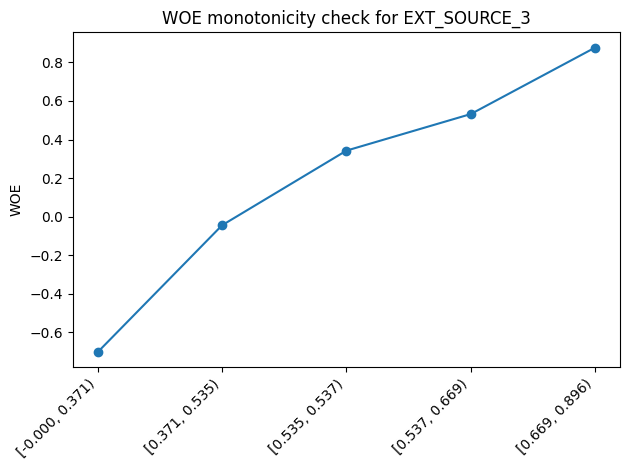

⇔ Feature: EXT_SOURCE_3
Coef: -0.6807
Monotonic WOE: YES
Reversed logic (based on majority WOE vs coef sign): NO
✅ Looks consistent: safer bins (higher WOE) should map to lower default with a negative coef.


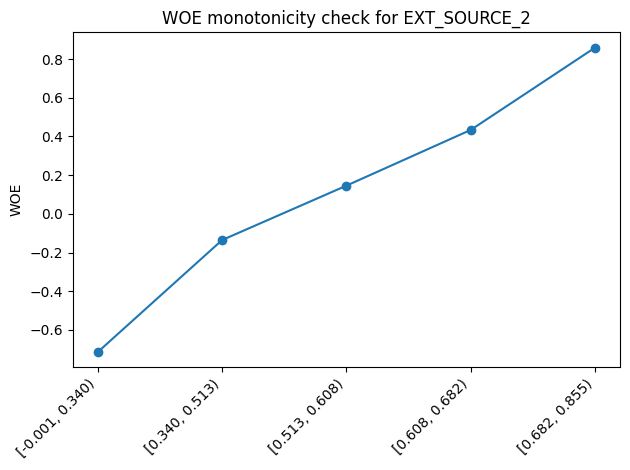

⇔ Feature: EXT_SOURCE_2
Coef: -1.0279
Monotonic WOE: YES
Reversed logic (based on majority WOE vs coef sign): NO
✅ Looks consistent: safer bins (higher WOE) should map to lower default with a negative coef.


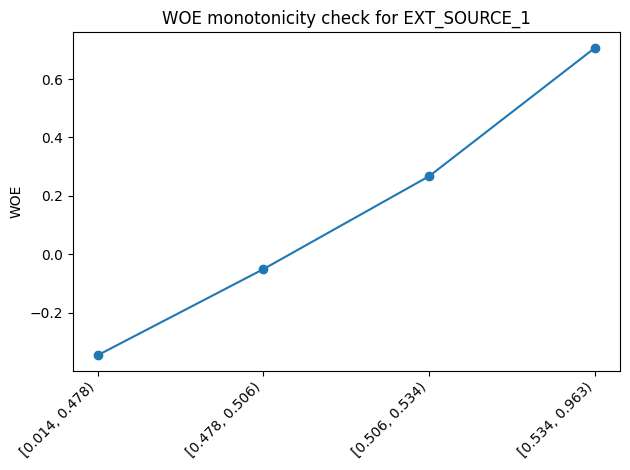

⇔ Feature: EXT_SOURCE_1
Coef: -1.1302
Monotonic WOE: YES
Reversed logic (based on majority WOE vs coef sign): NO
✅ Looks consistent: safer bins (higher WOE) should map to lower default with a negative coef.


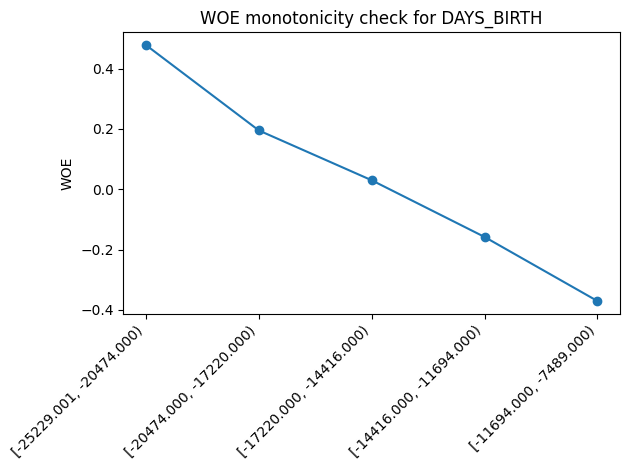

⇔ Feature: DAYS_BIRTH
Coef: -1.1739
Monotonic WOE: YES
Reversed logic (based on majority WOE vs coef sign): NO
✅ Looks consistent: safer bins (higher WOE) should map to lower default with a negative coef.


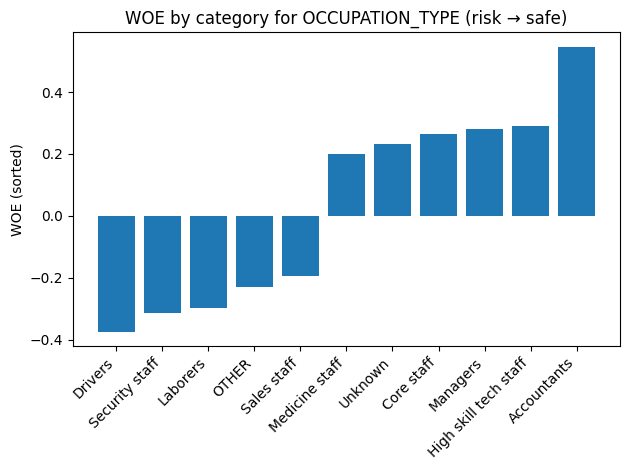

⇔ Feature: OCCUPATION_TYPE
Coef: -0.7613
Note: categories are sorted by WOE from riskier (more negative) to safer (more positive).
✅ Looks reasonable if safer categories (right side) align with a negative coefficient.


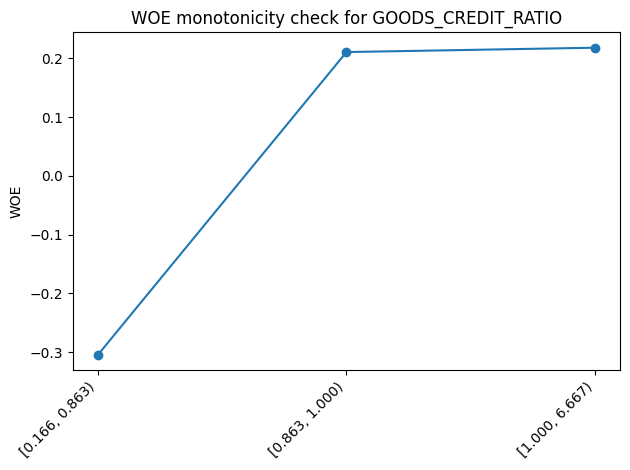

⇔ Feature: GOODS_CREDIT_RATIO
Coef: -2.0872
Monotonic WOE: YES
Reversed logic (based on majority WOE vs coef sign): NO
✅ Looks consistent: safer bins (higher WOE) should map to lower default with a negative coef.


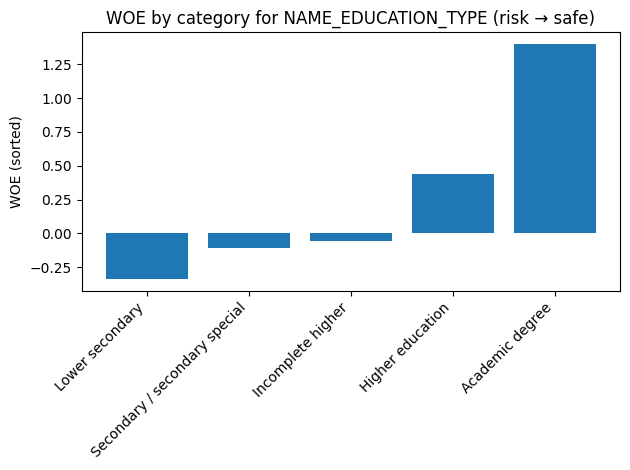

⇔ Feature: NAME_EDUCATION_TYPE
Coef: -0.7141
Note: categories are sorted by WOE from riskier (more negative) to safer (more positive).
✅ Looks reasonable if safer categories (right side) align with a negative coefficient.


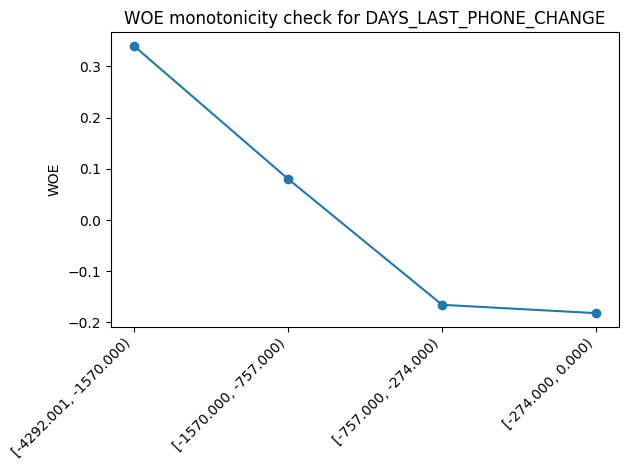

⇔ Feature: DAYS_LAST_PHONE_CHANGE
Coef: -0.9857
Monotonic WOE: YES
Reversed logic (based on majority WOE vs coef sign): NO
✅ Looks consistent: safer bins (higher WOE) should map to lower default with a negative coef.


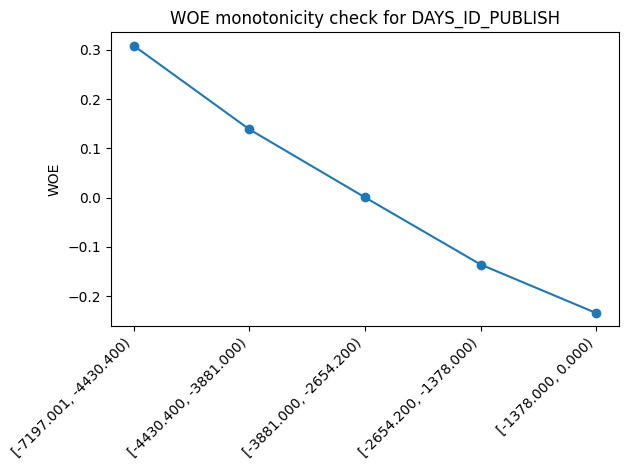

⇔ Feature: DAYS_ID_PUBLISH
Coef: -1.1989
Monotonic WOE: YES
Reversed logic (based on majority WOE vs coef sign): NO
✅ Looks consistent: safer bins (higher WOE) should map to lower default with a negative coef.


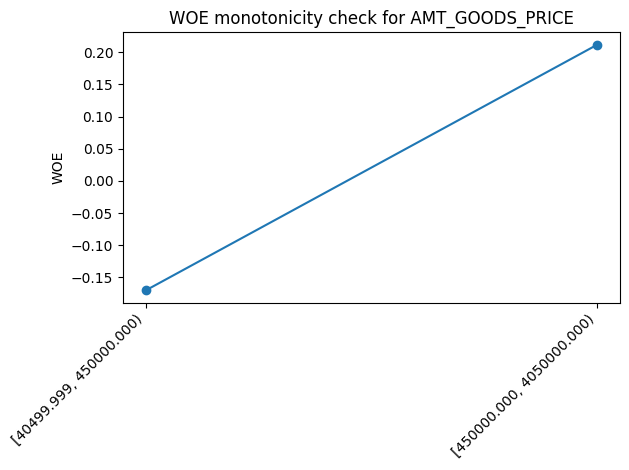

⇔ Feature: AMT_GOODS_PRICE
Coef: 0.0000
Monotonic WOE: YES
Reversed logic (based on majority WOE vs coef sign): NO
✅ Looks consistent: safer bins (higher WOE) should map to lower default with a negative coef.


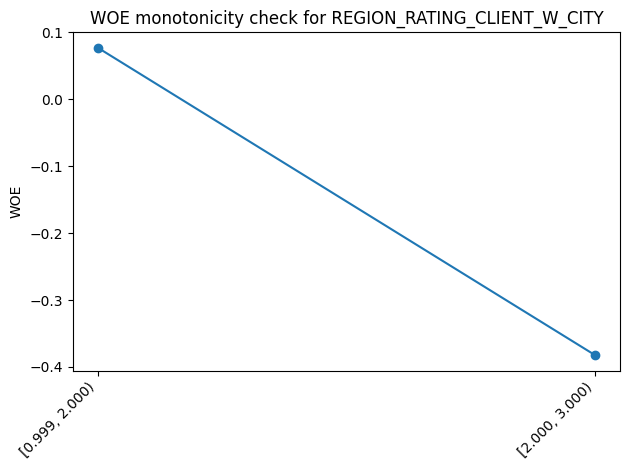

⇔ Feature: REGION_RATING_CLIENT_W_CITY
Coef: 0.0000
Monotonic WOE: YES
Reversed logic (based on majority WOE vs coef sign): NO
✅ Looks consistent: safer bins (higher WOE) should map to lower default with a negative coef.


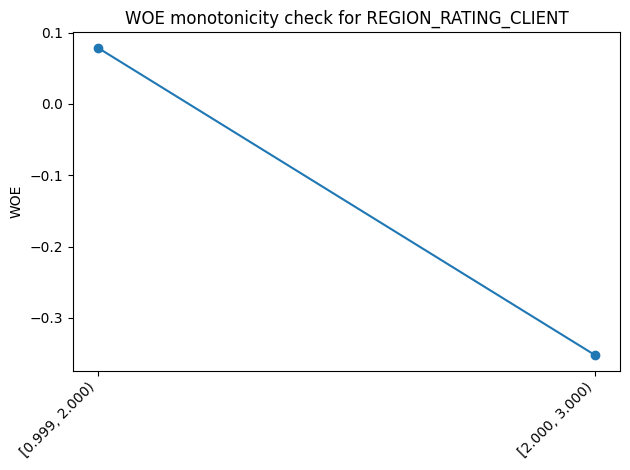

⇔ Feature: REGION_RATING_CLIENT
Coef: 0.0000
Monotonic WOE: YES
Reversed logic (based on majority WOE vs coef sign): NO
✅ Looks consistent: safer bins (higher WOE) should map to lower default with a negative coef.


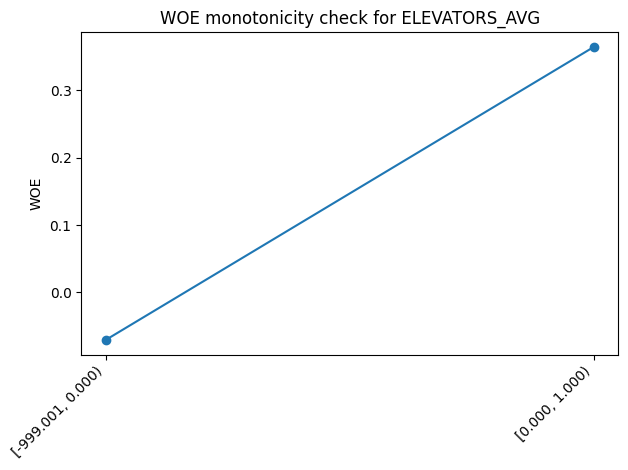

⇔ Feature: ELEVATORS_AVG
Coef: 0.0000
Monotonic WOE: YES
Reversed logic (based on majority WOE vs coef sign): NO
✅ Looks consistent: safer bins (higher WOE) should map to lower default with a negative coef.


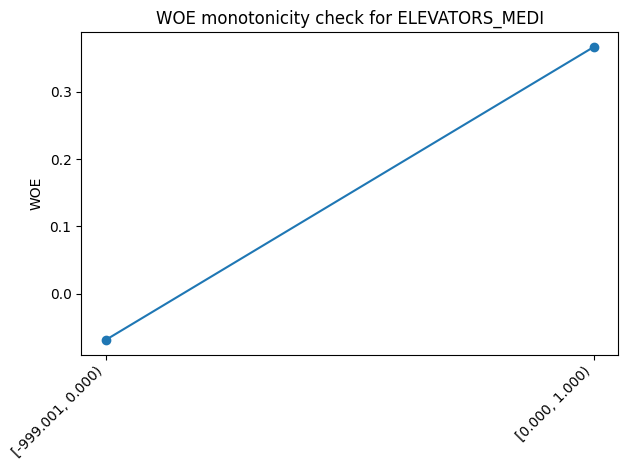

⇔ Feature: ELEVATORS_MEDI
Coef: 0.0000
Monotonic WOE: YES
Reversed logic (based on majority WOE vs coef sign): NO
✅ Looks consistent: safer bins (higher WOE) should map to lower default with a negative coef.


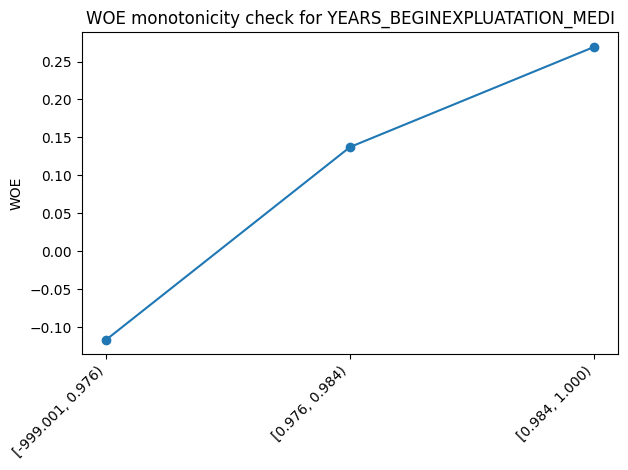

⇔ Feature: YEARS_BEGINEXPLUATATION_MEDI
Coef: -0.8385
Monotonic WOE: YES
Reversed logic (based on majority WOE vs coef sign): NO
✅ Looks consistent: safer bins (higher WOE) should map to lower default with a negative coef.


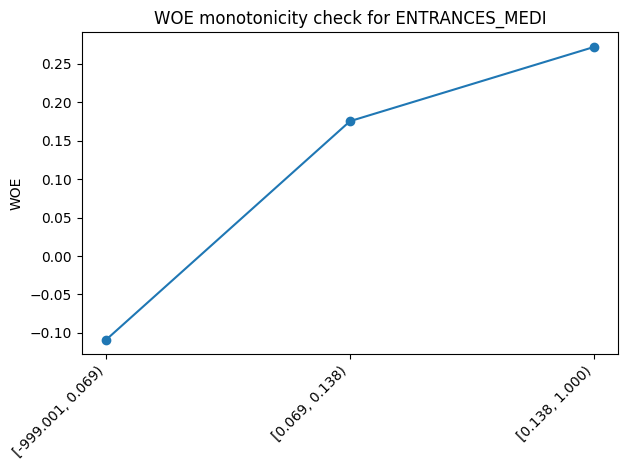

⇔ Feature: ENTRANCES_MEDI
Coef: -0.6978
Monotonic WOE: YES
Reversed logic (based on majority WOE vs coef sign): NO
✅ Looks consistent: safer bins (higher WOE) should map to lower default with a negative coef.


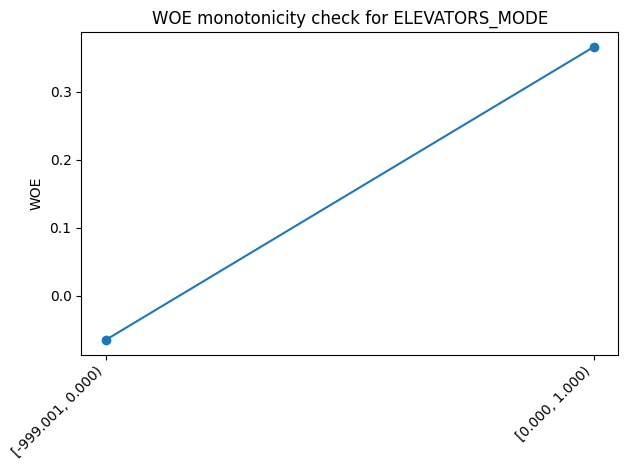

⇔ Feature: ELEVATORS_MODE
Coef: 0.0000
Monotonic WOE: YES
Reversed logic (based on majority WOE vs coef sign): NO
✅ Looks consistent: safer bins (higher WOE) should map to lower default with a negative coef.


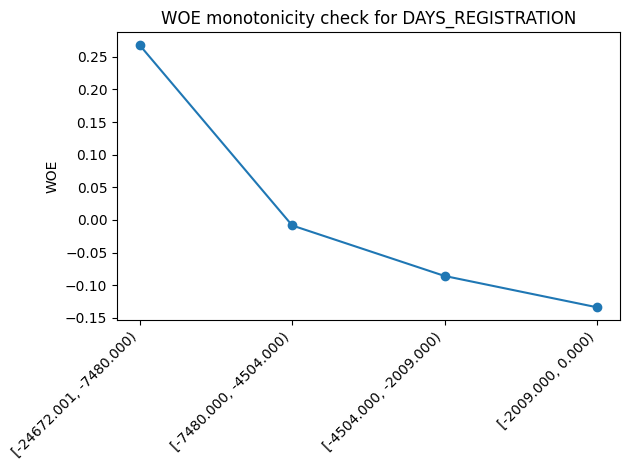

⇔ Feature: DAYS_REGISTRATION
Coef: -1.0885
Monotonic WOE: YES
Reversed logic (based on majority WOE vs coef sign): NO
✅ Looks consistent: safer bins (higher WOE) should map to lower default with a negative coef.


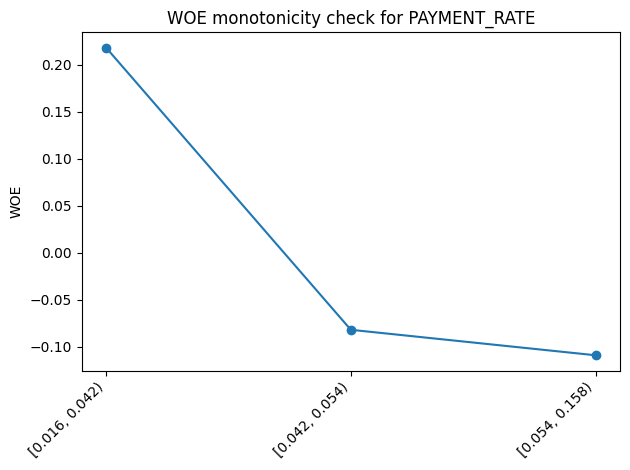

⇔ Feature: PAYMENT_RATE
Coef: -1.0752
Monotonic WOE: YES
Reversed logic (based on majority WOE vs coef sign): NO
✅ Looks consistent: safer bins (higher WOE) should map to lower default with a negative coef.


In [84]:
for feat in selected:
    plot_woe_feature(feat)

## All Scorecard Tables

In [85]:
# Score the validation set with “points” and take a quick look
# We already have X_val = WOE features for 'selected'
def row_points(woe_row):
    total = base_points
    for feat, beta in zip(selected, betas):
        w = woe_row[feat]
        total += int(round(- beta * w * Factor))
    return total

In [86]:
val_scores = X_val.apply(row_points, axis=1)
val_probs  = logit.predict_proba(X_val)[:, 1]

val_frame = pd.DataFrame({
    'SK_ID_CURR': train.loc[X_val.index, ID_COL].values,
    'PROB_DEFAULT': val_probs,
    'SCORE': val_scores,
    'TARGET': y_val.values
})

In [87]:
thr = best_thr

In [88]:
thr

0.4785408270462076

In [89]:
val_frame = val_frame.copy()
val_frame['PRED'] = (val_frame['PROB_DEFAULT'] >= thr).astype(int)

def error_type(row):
    if row['PRED'] == 1 and row['TARGET'] == 0:
        return 'FP'
    if row['PRED'] == 0 and row['TARGET'] == 1:
        return 'FN'
    if row['PRED'] == 1 and row['TARGET'] == 1:
        return 'TP'
    return 'TN'

val_frame['CASE'] = val_frame.apply(error_type, axis=1)
val_frame.tail(10)

,SK_ID_CURR,PROB_DEFAULT,SCORE,TARGET,PRED,CASE
161745,287517,0.327875,436,0,0,TN
192163,322836,0.387068,418,0,0,TN
302748,450771,0.507291,383,0,1,FP
276799,420782,0.637807,344,1,1,TP
214003,347992,0.371009,422,0,0,TN
252444,392112,0.617844,349,0,1,FP
224358,359872,0.416825,408,0,0,TN
111956,229885,0.560460,367,0,1,FP
273961,417584,0.549230,370,1,1,TP
191288,321803,0.628559,347,0,1,FP


In [90]:
# Simple validation snapshot (AUC, PR-AUC)
print(f"AUC: {roc_auc_score(y_val, val_probs):.3f}")
print(f"PR-AUC: {average_precision_score(y_val, val_probs):.3f}")

# Use best_thr from Cell C9
pred = (val_probs >= best_thr).astype(int)
tp = ((pred == 1) & (y_val == 1)).sum()
fp = ((pred == 1) & (y_val == 0)).sum()
tn = ((pred == 0) & (y_val == 0)).sum()
fn = ((pred == 0) & (y_val == 1)).sum()
print(f"THRESHOLD = {best_thr:.4f} → TP = {tp}, FP = {fp}, TN = {tn}, FN = {fn}")

print("BASE POINTS:", base_points)
print("\nSCORE SUMMARY:")
val_frame[['SCORE']].describe()

AUC: 0.639
PR-AUC: 0.134
THRESHOLD = 0.4785 → TP = 3307, FP = 26483, TN = 30052, FN = 1658
BASE POINTS: 355

SCORE SUMMARY:


,SCORE
count,61500.000000
mean,392.422228
std,37.083080
min,269.000000
25%,367.000000
50%,392.000000
75%,418.000000
max,534.000000


In [91]:
test_scores = X_test.apply(row_points, axis=1)
probs_test  = logit.predict_proba(X_test)[:, 1]

In [92]:
out_probs = pd.DataFrame({ID_COL: test[ID_COL], 'TARGET': probs_test})
out_scores = pd.DataFrame({ID_COL: test[ID_COL], 'SCORE': test_scores, 'PROB_DEFAULT': probs_test})
selected_export = pd.DataFrame({'feature': selected})
coef_export = pd.DataFrame({'feature': selected, 'coef': betas})

In [93]:
# merge IV and coef
iv_n_coef = iv_df.merge(coef_df, on='feature', how='inner')
iv_n_coef['abs_coef'] = iv_n_coef['coef'].abs()
iv_n_coef_sorted = iv_n_coef.sort_values(['IV','abs_coef'], ascending=[False, False])

In [94]:
scorecard_table.head()

,feature,bin_or_level,WOE,coef,points
0,EXT_SOURCE_3,"[-0.000, 0.371)",-0.702233,-0.680666,-34
1,EXT_SOURCE_3,"[0.371, 0.535)",-0.044403,-0.680666,-2
2,EXT_SOURCE_3,"[0.535, 0.537)",0.342571,-0.680666,17
3,EXT_SOURCE_3,"[0.537, 0.669)",0.532259,-0.680666,26
4,EXT_SOURCE_3,"[0.669, 0.896)",0.877162,-0.680666,43


In [95]:
out_probs.head()

,SK_ID_CURR,TARGET
0,100001,0.393827
1,100005,0.650260
2,100013,0.357093
3,100028,0.420978
4,100038,0.472982


In [96]:
out_scores.head()

,SK_ID_CURR,SCORE,PROB_DEFAULT
0,100001,416,0.393827
1,100005,339,0.650260
2,100013,427,0.357093
3,100028,407,0.420978
4,100038,393,0.472982


In [97]:
selected_export.head()

,feature
0,EXT_SOURCE_3
1,EXT_SOURCE_2
2,EXT_SOURCE_1
3,DAYS_BIRTH
4,OCCUPATION_TYPE


In [98]:
coef_export.head()

,feature,coef
0,EXT_SOURCE_3,-0.680666
1,EXT_SOURCE_2,-1.027935
2,EXT_SOURCE_1,-1.130242
3,DAYS_BIRTH,-1.173915
4,OCCUPATION_TYPE,-0.761312


In [99]:
iv_n_coef_sorted.head()

,feature,IV,coef,abs_coef
0,EXT_SOURCE_3,0.286326,-0.680666,0.680666
1,EXT_SOURCE_2,0.280602,-1.027935,1.027935
2,EXT_SOURCE_1,0.105184,-1.130242,1.130242
3,DAYS_BIRTH,0.082065,-1.173915,1.173915
4,OCCUPATION_TYPE,0.075731,-0.761312,0.761312


In [100]:
scorecard_table.to_csv('../tmp_dataset/scorecard_table.csv', index=False)
out_probs.to_csv('../tmp_dataset/submission_probs.csv', index=False)
out_scores.to_csv('../tmp_dataset/credit_scores.csv', index=False)
selected_export.to_csv('../tmp_dataset/selected_features.csv', index=False)
coef_export.to_csv('../tmp_dataset/logit_coefficients.csv', index=False)

# Interpretation

**Per-person explanation using scorecard points**

In [101]:
def explain_person(sk_id, df_original, X_woe_matrix, selected_features, betas, Factor, base_points, id_col='SK_ID_CURR'):
    # locate row index
    idx = df_original.index[df_original[id_col] == sk_id]
    if len(idx) == 0:
        print("ID not found:", sk_id)
        return None
    idx = idx[0]
    
    # grab the WOE row
    woe_row = X_woe_matrix.loc[idx, selected_features]
    
    # compute per-feature points
    rows = []
    for feat, beta in zip(selected_features, betas):
        w = float(woe_row[feat])
        pts = int(round(- beta * w * Factor))
        
        # direction: negative points = riskier, positive points = safer
        direction = "risk↑" if pts < 0 else ("safe↑" if pts > 0 else "neutral")
        rows.append([feat, w, float(beta), pts, direction])
    
    # assemble table
    breakdown = pd.DataFrame(rows, columns=['feature','WOE','coef','points','direction'])
    breakdown = breakdown.sort_values('points')  # most negative (risk) at top
    
    # totals
    total_points = int(breakdown['points'].sum())
    final_score = base_points + total_points
    
    print(f"SK_ID_CURR: {sk_id}")
    print(f"BASE POINTS: {base_points}")
    print(f"SUM FEATURE POINTS: {total_points}")
    print(f"FINAL SCORE: {final_score}")
    return breakdown

In [102]:
# train or test -> test (exclude TARGET column)
# train[['SK_ID_CURR','TARGET'] + X_woe.columns.tolist()].sample(1).T

In [103]:
# train.loc[train['SK_ID_CURR'] == 420782, ['SK_ID_CURR','TARGET'] + X_woe.columns.tolist()].T

In [104]:
row_example = train.loc[train['SK_ID_CURR'] == 420782, ['SK_ID_CURR'] + X_woe.columns.tolist()]
merged = val_frame.merge(row_example, on='SK_ID_CURR', how='inner')
merged.T

,0
SK_ID_CURR,420782
PROB_DEFAULT,0.637807
SCORE,344
TARGET,1
PRED,1
CASE,TP
EXT_SOURCE_3,0.353988
EXT_SOURCE_2,0.034205
EXT_SOURCE_1,0.505998
DAYS_BIRTH,-15035


In [105]:
# Explain one validation ID
example_id = 420782

In [106]:
bk = explain_person(
    sk_id=example_id,
    df_original=train.loc[X_val.index, [ID_COL, TARGET_COL]],  # val subset with IDs
    X_woe_matrix=X_val,
    selected_features=selected,
    betas=logit.coef_.ravel(),
    Factor=Factor,
    base_points=base_points,
    id_col=ID_COL
)

SK_ID_CURR: 420782
BASE POINTS: 355
SUM FEATURE POINTS: -11
FINAL SCORE: 344


In [107]:
# Show top risk drivers (most negative points) and top protective drivers (most positive)
if bk is not None:
    print("Top risk drivers:")
    display(bk.head())
    print("\nTop protective drivers:")
    display(bk.sort_values('points', ascending=False).head())

Top risk drivers:


,feature,WOE,coef,points,direction
4,OCCUPATION_TYPE,-0.297866,-0.761312,-16,risk↑
7,DAYS_LAST_PHONE_CHANGE,-0.165579,-0.985743,-12,risk↑
17,DAYS_REGISTRATION,-0.085955,-1.088477,-7,risk↑
18,PAYMENT_RATE,-0.082167,-1.075184,-6,risk↑
2,EXT_SOURCE_1,-0.050712,-1.130242,-4,risk↑



Top protective drivers:


,feature,WOE,coef,points,direction
6,NAME_EDUCATION_TYPE,0.439469,-0.714077,23,safe↑
14,YEARS_BEGINEXPLUATATION_MEDI,0.137428,-0.838470,8,safe↑
3,DAYS_BIRTH,0.029841,-1.173915,3,safe↑
0,EXT_SOURCE_3,0.000000,-0.680666,0,neutral
9,AMT_GOODS_PRICE,0.000000,0.000000,0,neutral
